In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv('../data/data_outlier.csv')
data

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
1,7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
2,10,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
3,11,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
4,13,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,554,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
394,555,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
395,558,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
396,560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [6]:
y = data.diagnosis                          # M or B 
list = ['Unnamed: 0','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
1,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
2,16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
3,15.78,17.89,103.6,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,20.42,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
4,15.85,23.95,103.7,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


<AxesSubplot:>

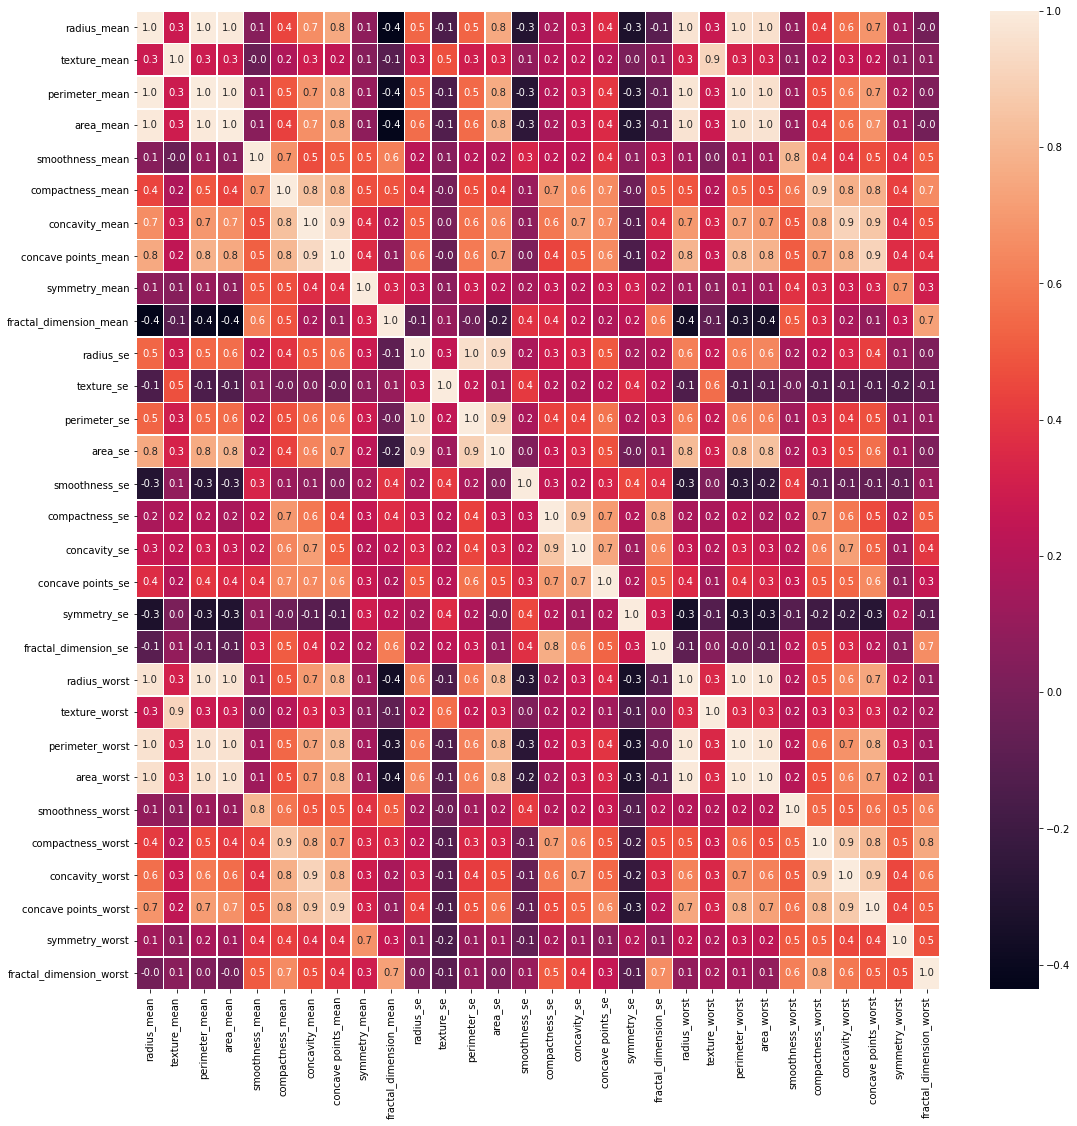

In [7]:

#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [8]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,19.98,1040.0,0.09463,0.11270,0.1794,0.05742,0.7732,53.91,0.004314,0.02254,0.01369,0.002179,0.1442,0.3784,0.3063,0.08368
1,20.83,577.9,0.11890,0.09366,0.2196,0.07451,1.3770,50.96,0.008805,0.02488,0.01486,0.005412,0.1654,0.2678,0.3196,0.11510
2,23.24,797.8,0.08206,0.03299,0.1528,0.05697,1.1870,40.51,0.004029,0.01101,0.01460,0.003042,0.1181,0.1459,0.2948,0.08452
3,17.89,781.0,0.09710,0.09954,0.1842,0.06082,0.9849,54.16,0.005771,0.02791,0.02008,0.004144,0.1396,0.3965,0.3792,0.10480
4,23.95,782.7,0.08401,0.09938,0.1847,0.05338,1.0780,36.58,0.009769,0.05051,0.02981,0.003002,0.1131,0.2322,0.2809,0.06287


<AxesSubplot:>

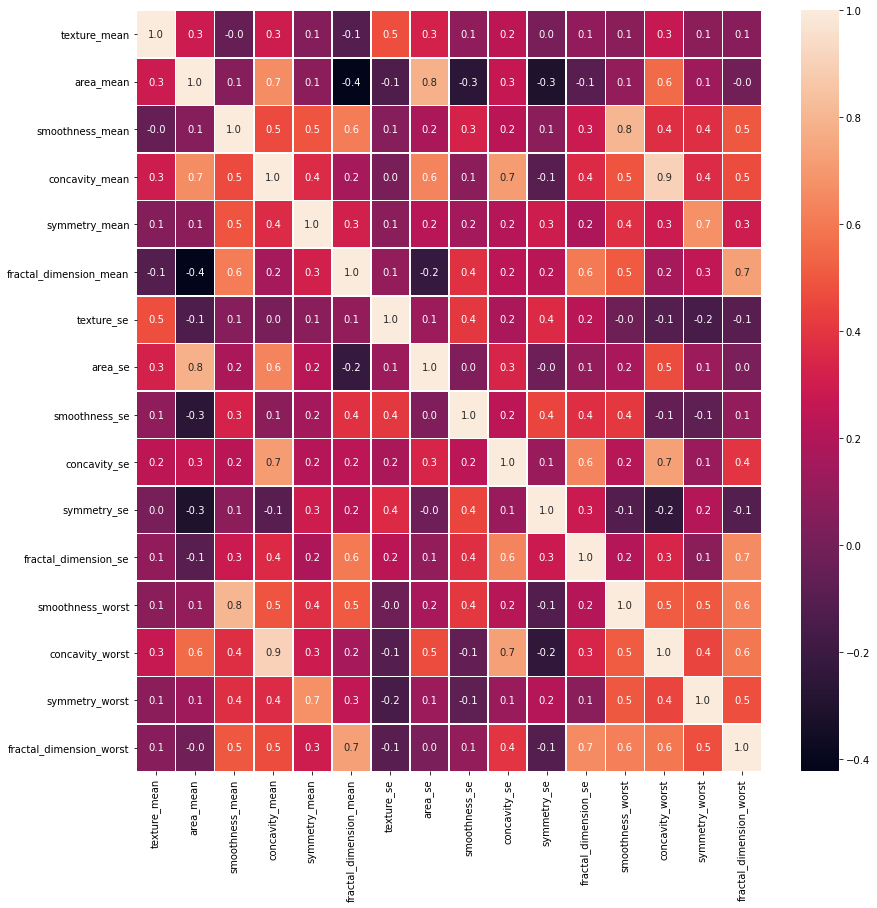

In [9]:

#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [10]:
x_1['diagnosis']=y

In [11]:
x_1.to_csv('../data/Feature_selection_with_correlation.csv',index=False)

UNIVARIANT FEATURE SELECTION 

In [12]:
x_1=x_1.drop(['diagnosis'],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [15]:

print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)


Score list: [3.08358762e+01 1.11876601e+04 3.69881678e-02 5.51314278e+00
 3.65294814e-02 2.47035139e-04 5.88482588e-03 1.12732537e+03
 5.72605070e-06 2.93576347e-01 1.63514281e-02 4.36829214e-04
 1.46881504e-01 1.15992385e+01 1.99482770e-01 4.62727011e-02]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [17]:

X_2=data[['diagnosis','area_mean','area_se','texture_mean','concavity_worst','concavity_mean']]

In [18]:
X_2.to_csv('../data/Univariate_feature_selection_best_5_features.csv',index=False)